# Linear regression with various methods
This is a very simple example of using two scipy tools for linear regression.
* Scipy.Polyfit
* Stats.linregress
* Optimize.curve_fit
* numpy.linalg.lstsq
* statsmodels.OLS
* Analytic solution using Moore-Penrose generalized inverse or simple multiplicative matrix inverse
* sklearn.linear_model.LinearRegression

# Import Libraries

In [1]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Generate random data of a sufficiently large size

In [16]:
#Sample data creation
#Number of points
n = int(5e6)  # 5000000
t = np.linspace(-10, 10, n)    #Create an array with size n range -10 -> 10

#Params
a = 3.25; b=-6.5
x = polyval(p=[a,b], x=t)

#Add some noise
xn = x + 3 * randn(n)

## Draw few random sample points and plot

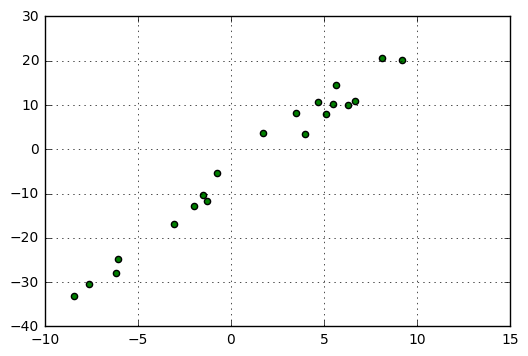

In [24]:
xvar = np.random.choice(t, size=20)
yvar = polyval(p=[a,b], x=xvar) + 3*randn(20)
plt.scatter(xvar, yvar, c='green', edgecolors='k')
plt.grid(True)
plt.show()

## Method: Scipy.Polyfit

In [25]:
#Linear regression -polyfit - polyfit can be used other orders polynomials
start = time.time()
(ar, br) = polyfit(x=t, y=xn, deg=1)
xr = polyval(p=[ar,br], x=t)

#Compute the mean square error
err = sqrt(sum((xr-xn)**2)/n)
end = time.time()
t_polyfit = float(end - start)

print('Linear regression using polyfit')
print('Parameters: a=%.2f, b=%.2f, ms error=%.3f' % (ar, br, err))
print('Time taken: {}'.format(t_polyfit))

Linear regression using polyfit
Parameters: a=3.25, b=-6.50, ms error=3.001
Time taken: 1.3345680236816406


## Method: Stats.linregress

In [26]:
#Linear regression using stats.linregress
start = time.time()
(a_s, b_s, r, tt, stderr) = stats.linregress(x=t, y=xn)
end = time.time()
t_linregress = float(end - start)

print('Linear regression using stats.linregress')
print('Parameters: a=%.2f, b=%.2f, std error=%.3f, r^2 coefficient=%.3f' % (a_s, b_s, stderr, r))
print('Time taken: {}'.format(t_linregress))

Linear regression using stats.linregress
Parameters: a=3.25, b=-6.50, std error=0.000, r^2 coefficient=0.987
Time taken: 0.13294219970703125


## Method: Optimize.curve_fit

In [27]:
def flin(t,a,b):
    result = a*t+b
    return result

In [28]:
start = time.time()
p1, _ = optimize.curve_fit(flin, xdata=t, ydata=xn, method='lm')
end = time.time()
t_optimize_curve_fit = float(end - start)

print('Linear regression using optimize.curve_fit')
print('Parameters: a=%.2f, b=%.2f' % (p1[0], p1[1]))
print('Time taken: {}'.format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
Parameters: a=3.25, b=-6.50
Time taken: 1.6604621410369873


## Method: numpy.linalg.lstsq

In [30]:
start = time.time()
A = np.vstack(tup=[t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar, br = result[0]
err = np.sqrt(result[1]/len(xn))
end = time.time()
t_linalg_lstsq = float(end - start)

print('Linear regression using numpy.linalg.lstsq')
print('Parameters: a=%.2f, b=%.2f, ms error=%.3f' % (ar, br, err))
print('Time taken: {}'.format(t_linalg_lstsq))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


Linear regression using numpy.linalg.lstsq
Parameters: a=3.25, b=-6.50, ms error=3.001
Time taken: 0.2639143466949463


## Method: Statsmodels.OLS

In [32]:
start = time.time()
t = sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar = results.params[1]
br = results.params[0]
end = time.time()
t_OLS = float(end - start)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))
print(results.summary())

Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 0.8886981010437012 seconds
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.287e+34
Date:                Wed, 25 Jul 2018   Prob (F-statistic):               0.00
Time:                        05:03:36   Log-Likelihood:             1.3904e+08
No. Observations:             5000000   AIC:                        -2.781e+08
Df Residuals:                 4999998   BIC:                        -2.781e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

## Method: Analytic solution using Moore-Penrose pseudoinverse

In [33]:
start = time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
end = time.time()
t_inv_matrix = float(end - start)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix))

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.36388063430786133 seconds


## Method: Analytic solution using simple multiplicative matrix inverse

In [35]:
start = time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
end = time.time()
t_simple_inv = float(end - start)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv))

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.1039583683013916 seconds


## Method: sklearn.linear_model.LinearRegression

In [36]:
start = time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
end = time.time()
t_sklearn_linear = float(end - start)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.45885133743286133 seconds


## Bucket all the execution times in a list and plot

In [37]:
times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,t_inv_matrix,t_simple_inv,t_sklearn_linear]

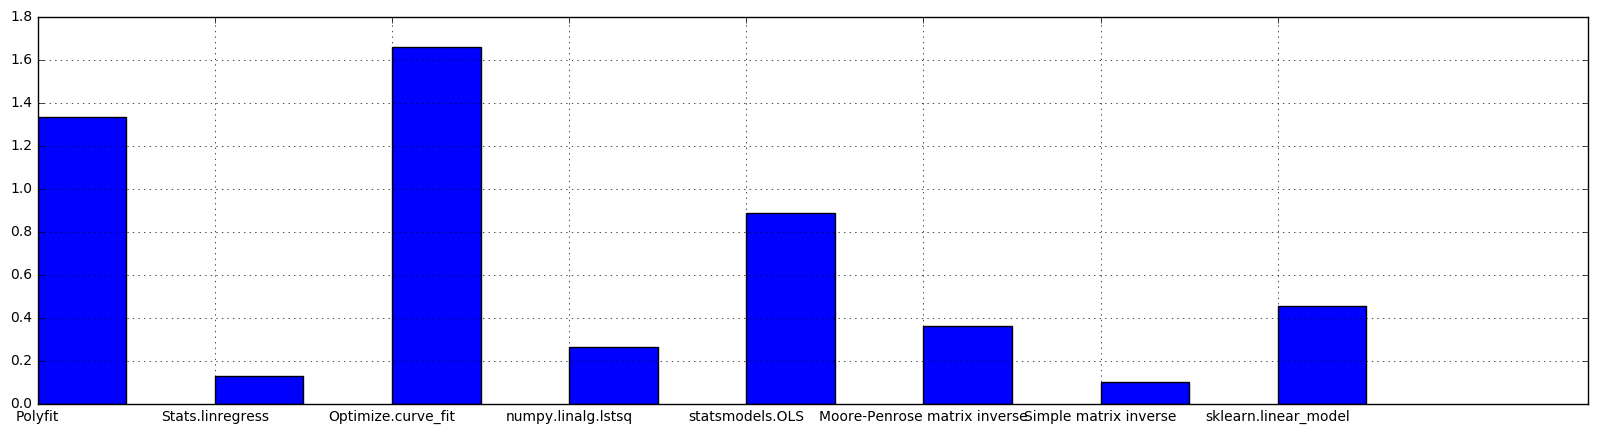

In [44]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.show()

In [45]:
n_min = 50000
n_max = int(1e7)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [49]:
l1=['Polyfit', 'Stats.lingress','Optimize.curve_fit', 'linalg.lstsq', 
 'statsmodels.OLS', 'Moore-Penrose matrix inverse', 'Simple matrix inverse', 'sklearn.linear_model']
time_dict = {key:[] for key in l1}


from tqdm import tqdm
for i in tqdm(range(len(n_data))):
    t=np.linspace(-10,10,n_data[i])
    #parameters
    a=3.25; b=-6.5
    x=polyval([a,b],t)
    #add some noise
    xn=x+3*randn(n_data[i])
    
    #Linear regressison -polyfit - polyfit can be used other orders polynomials
    t1=time.time()
    (ar,br)=polyfit(t,xn,1)
    t2=time.time()
    t_polyfit = 1e3*float(t2-t1)
    time_dict['Polyfit'].append(t_polyfit)
    
    #Linear regression using stats.linregress
    t1=time.time()
    (a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
    t2=time.time()
    t_linregress = 1e3*float(t2-t1)
    time_dict['Stats.lingress'].append(t_linregress)
    
    #Linear regression using optimize.curve_fit
    t1=time.time()
    p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
    t2=time.time()
    t_optimize_curve_fit = 1e3*float(t2-t1)
    time_dict['Optimize.curve_fit'].append(t_optimize_curve_fit)
    
    # Linear regression using np.linalg.lstsq (solving Ax=B equation system)
    t1=time.time()
    A = np.vstack([t, np.ones(len(t))]).T
    result = np.linalg.lstsq(A, xn)
    ar,br = result[0]
    t2=time.time()
    t_linalg_lstsq = 1e3*float(t2-t1)
    time_dict['linalg.lstsq'].append(t_linalg_lstsq)
    
    # Linear regression using statsmodels.OLS
    t1=time.time()
    t=sm.add_constant(t)
    model = sm.OLS(x, t)
    results = model.fit()
    ar=results.params[1]
    br=results.params[0]
    t2=time.time()
    t_OLS = 1e3*float(t2-t1)
    time_dict['statsmodels.OLS'].append(t_OLS)
    
    # Linear regression using Moore-Penrose pseudoinverse matrix
    t1=time.time()
    mpinv = np.linalg.pinv(t)
    result = mpinv.dot(x)
    ar = result[1]
    br = result[0]
    t2=time.time()
    t_mpinverse = 1e3*float(t2-t1)
    time_dict['Moore-Penrose matrix inverse'].append(t_mpinverse)
    
    # Linear regression using simple multiplicative inverse matrix
    t1=time.time()
    m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
    ar = m[1]
    br = m[0]
    t2=time.time()
    t_simple_inv = 1e3*float(t2-t1)
    time_dict['Simple matrix inverse'].append(t_simple_inv)
    
    # Linear regression using scikit-learn's linear_model
    t1=time.time()
    lm = LinearRegression()
    lm.fit(t,x)
    ar=lm.coef_[1]
    br=lm.intercept_
    t2=time.time()
    t_sklearn_linear = 1e3*float(t2-t1)
    time_dict['sklearn.linear_model'].append(t_sklearn_linear)

  0%|          | 0/25 [00:00<?, ?it/s]C:\Users\StrikeWade\Anaconda3\lib\site-packages\ipykernel\__main__.py:39: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
100%|██████████| 25/25 [00:39<00:00,  5.40s/it]


In [50]:
time_dict

{'Moore-Penrose matrix inverse': [9.99903678894043,
  3.0007362365722656,
  5.997896194458008,
  5.997896194458008,
  7.997274398803711,
  10.996580123901367,
  12.99595832824707,
  16.994714736938477,
  20.992517471313477,
  22.994279861450195,
  33.98871421813965,
  39.98732566833496,
  49.985408782958984,
  64.98003005981445,
  79.97679710388184,
  100.96883773803711,
  121.96183204650879,
  150.95281600952148,
  191.94269180297852,
  247.92146682739258,
  316.89929962158203,
  373.8994598388672,
  463.853120803833,
  590.8100605010986,
  722.7659225463867],
 'Optimize.curve_fit': [5.998849868774414,
  6.9980621337890625,
  9.99760627746582,
  13.994455337524414,
  18.993854522705078,
  29.989957809448242,
  37.987470626831055,
  49.98373985290527,
  58.980464935302734,
  75.97494125366211,
  91.97044372558594,
  119.96102333068848,
  144.94895935058594,
  196.93684577941895,
  232.9261302947998,
  292.9055690765381,
  363.88254165649414,
  449.85389709472656,
  571.8154907226562,
 

In [51]:
df = pd.DataFrame(data=time_dict)
df

,Moore-Penrose matrix inverse,Optimize.curve_fit,Polyfit,Simple matrix inverse,Stats.lingress,linalg.lstsq,sklearn.linear_model,statsmodels.OLS
0,9.999037,5.998850,3.998995,0.997066,1.000881,10.994434,4.004002,36.987782
1,3.000736,6.998062,5.998611,0.998020,1.999378,2.998829,4.998207,8.996964
2,5.997896,9.997606,7.997513,2.000093,1.999378,2.998590,7.996321,11.996031
3,5.997896,13.994455,9.995937,1.999378,8.998394,2.998829,8.996725,13.995886
4,7.997274,18.993855,11.996269,1.999855,3.998995,3.999233,8.996964,16.993523
5,10.996580,29.989958,16.995192,2.999067,3.998995,6.997585,11.996746,23.992300
6,12.995958,37.987471,20.992517,2.999067,4.998684,9.997368,14.995337,27.990580
7,16.994715,49.983740,26.990891,3.998756,5.997896,11.996508,17.993927,35.988092
8,20.992517,58.980465,31.989574,5.998373,6.998062,16.006231,21.992445,43.975353
9,22.994280,75.974941,39.987087,6.996155,8.997679,18.994331,26.991367,50.983667


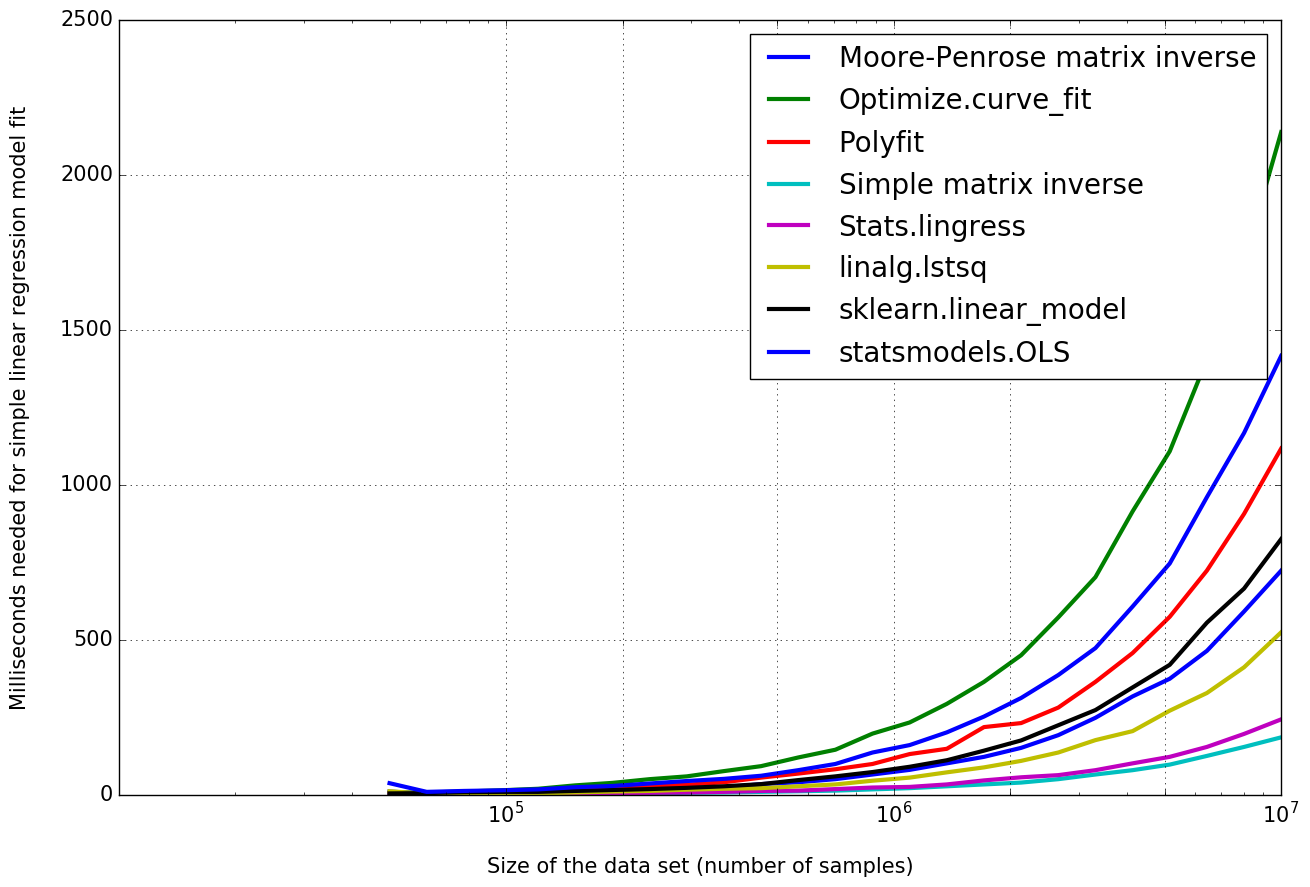

In [52]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

In [53]:
a1=df.iloc[n_levels-1]

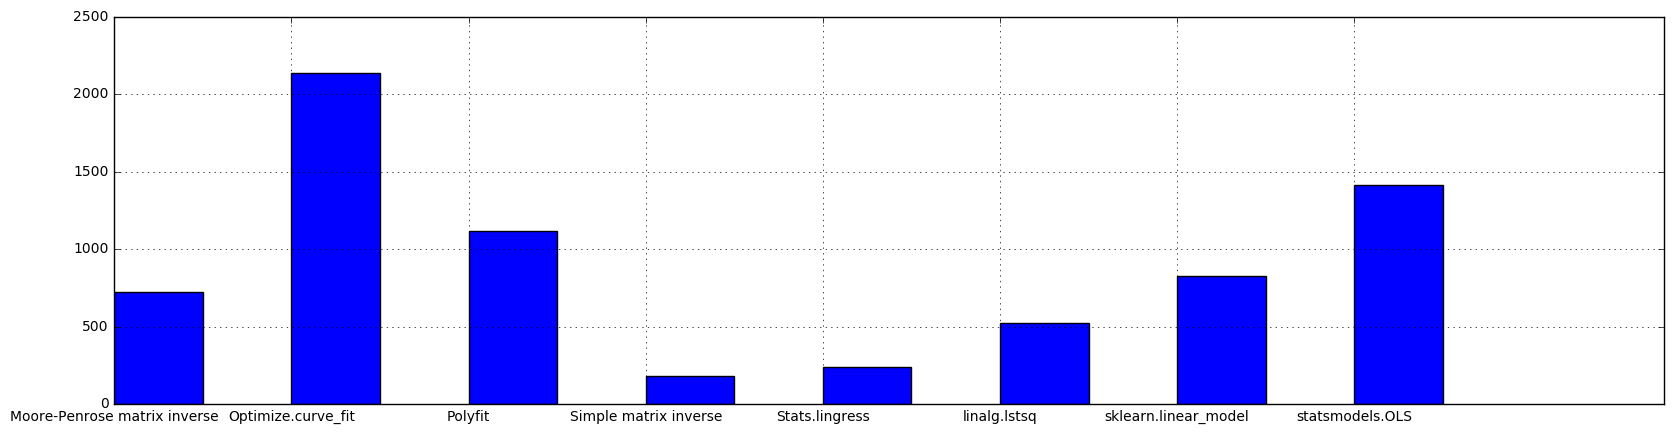

In [54]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()